In [1]:
# imports
from scripts.preprocess import main_preprocess
from scripts.cnn_architecture import BaselineCNN, CompactBatchnormCNN, PretrainedResNet, train
import torch
import torch.nn as nn
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir("..")

#### Getting data loaders and leveraging GPU:

In [2]:
# pull data loaders using main preprocess
train_loader, test_loader = main_preprocess()

# leverage gpu and push data loader to gpu
device = torch.device("mps" if torch.mps.is_available() else "cpu")

Class mapping: {'0': 0, '1': 1}
Training samples: 69
Test samples: 34


#### Initialize BaselineCNN and train:

In [3]:
# initalize baseline CNN, loss function, and optimizer
baseline_cnn = BaselineCNN().to(device)
loss_fn = nn.BCELoss()
optimizer = torch.optim.AdamW(baseline_cnn.parameters(), lr=3e-4, weight_decay=1e-4, betas=(0.9, 0.999))
num_epochs = 10

# train baseline_cnn
hist = train(model=baseline_cnn, loss_fn=loss_fn, optimizer=optimizer, train_dl=train_loader, valid_dl=test_loader, device=device, num_epochs=num_epochs)

/Users/coymorris/PycharmProjects/project3-cnn/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 1 accuracy: 0.5217 val_accuracy: 0.5294
Epoch 2 accuracy: 0.5362 val_accuracy: 0.5294
Epoch 3 accuracy: 0.5217 val_accuracy: 0.5294
Epoch 4 accuracy: 0.5362 val_accuracy: 0.5294
Epoch 5 accuracy: 0.5362 val_accuracy: 0.5294
Epoch 6 accuracy: 0.5362 val_accuracy: 0.5294
Epoch 7 accuracy: 0.5362 val_accuracy: 0.5294
Epoch 8 accuracy: 0.5362 val_accuracy: 0.5294
Epoch 9 accuracy: 0.5362 val_accuracy: 0.5294
Epoch 10 accuracy: 0.5362 val_accuracy: 0.5294


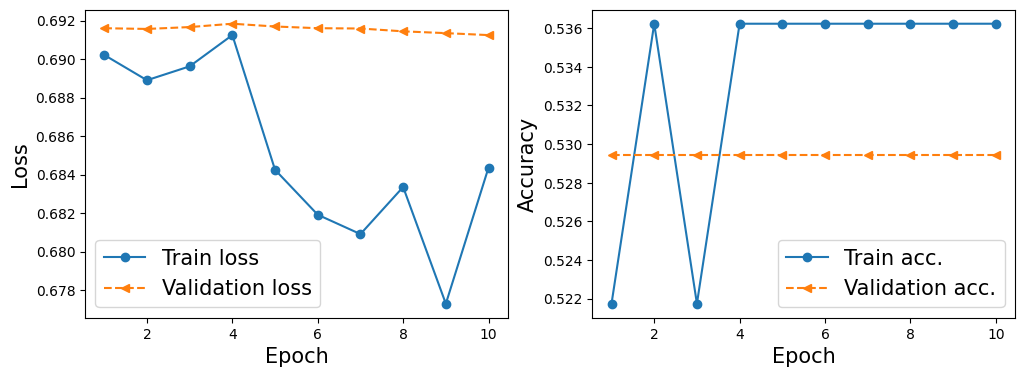

In [4]:
# plot loss
x_arr = np.arange(len(hist[0])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/14_17.png', dpi=300)
plt.show()

#### Initialize CompactCNN and train:

In [5]:
# initialize CompactBatchnormCNN, loss function, and optimizer
compact_cnn = CompactBatchnormCNN().to(device)
loss_fn = nn.BCELoss()
optimizer = torch.optim.AdamW(compact_cnn.parameters(), lr=3e-4, weight_decay=1e-4, betas=(0.9, 0.999))
num_epochs = 10

# train compact_cnn
hist = train(model=compact_cnn, loss_fn=loss_fn, optimizer=optimizer, train_dl=train_loader, valid_dl=test_loader, device=device, num_epochs=num_epochs)

Epoch 1 accuracy: 0.5652 val_accuracy: 0.5294
Epoch 2 accuracy: 0.7971 val_accuracy: 0.5294
Epoch 3 accuracy: 0.8406 val_accuracy: 0.6176
Epoch 4 accuracy: 0.8116 val_accuracy: 0.5000
Epoch 5 accuracy: 0.8696 val_accuracy: 0.6471
Epoch 6 accuracy: 0.8551 val_accuracy: 0.7059
Epoch 7 accuracy: 0.9710 val_accuracy: 0.6176
Epoch 8 accuracy: 0.8986 val_accuracy: 0.6765
Epoch 9 accuracy: 0.9275 val_accuracy: 0.7353
Epoch 10 accuracy: 0.9420 val_accuracy: 0.6765


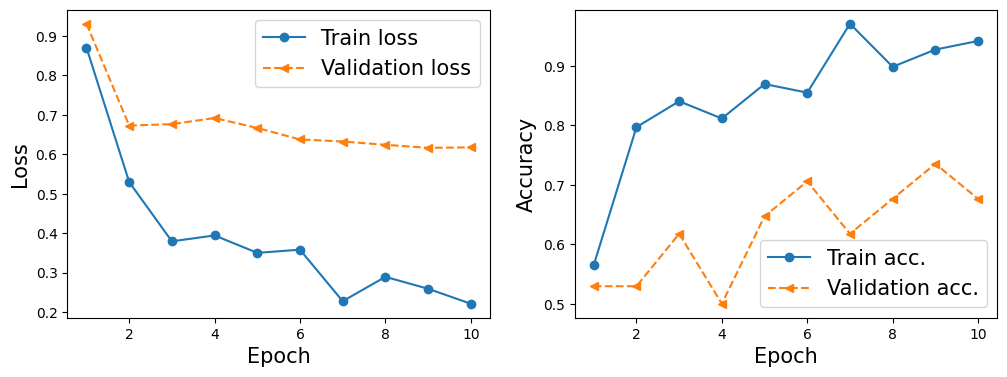

In [6]:
# plot loss
x_arr = np.arange(len(hist[0])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/14_17.png', dpi=300)
plt.show()

#### Load and fine-tune a pretrained ResNet backbone:


In [7]:
# load pretrained ResNet18 and fine-tune the classification head
resnet_model = PretrainedResNet(model_name="resnet18", pretrained=True, train_backbone=False, dropout=0.4).to(device)
resnet_loss_fn = nn.BCELoss()
resnet_optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, resnet_model.parameters()), lr=1e-4, weight_decay=1e-4)
resnet_epochs = 5

resnet_hist = train(model=resnet_model, loss_fn=resnet_loss_fn, optimizer=resnet_optimizer, train_dl=train_loader,valid_dl=test_loader, device=device, num_epochs=resnet_epochs)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/coymorris/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100.0%


Epoch 1 accuracy: 0.5797 val_accuracy: 0.5000
Epoch 2 accuracy: 0.5507 val_accuracy: 0.5000
Epoch 3 accuracy: 0.6087 val_accuracy: 0.4706
Epoch 4 accuracy: 0.6377 val_accuracy: 0.4706
Epoch 5 accuracy: 0.5072 val_accuracy: 0.4118


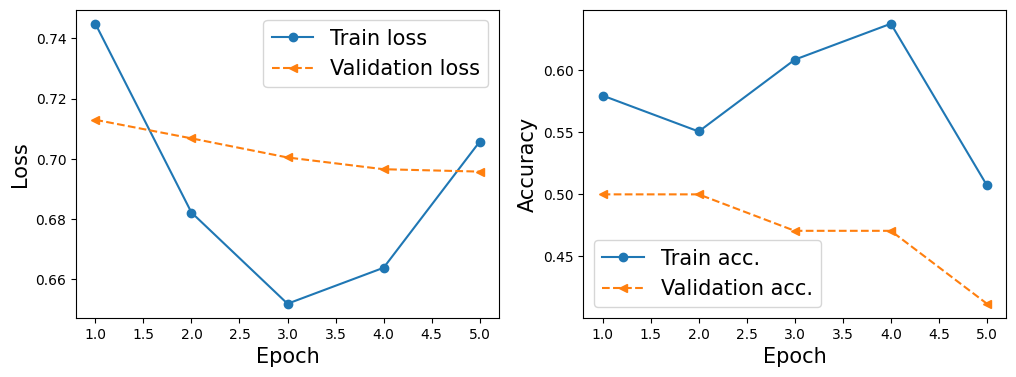

In [8]:
# plot ResNet fine-tuning curves
x_arr = np.arange(len(resnet_hist[0])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, resnet_hist[0], '-o', label='Train loss')
ax.plot(x_arr, resnet_hist[1], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, resnet_hist[2], '-o', label='Train acc.')
ax.plot(x_arr, resnet_hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()


#### Save models:

In [9]:
# save models
torch.save(baseline_cnn.state_dict(), "baseline_cnn.pth")
torch.save(compact_cnn.state_dict(), "compact_cnn.pth")
torch.save(resnet_model.state_dict(), "resnet18_finetuned.pth")